# Rapport d'analyses des données

#### Importation des données

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
os.chdir(r'C:\Documents\travail\LYON2\M2\visualisation donnees securite\challenge-2023\données\log_fw_4.csv')

In [2]:
df = pd.read_csv('log_fw_4.csv',sep=';',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2022-02-23 09:30:55,89.248.165.121,17.17.17.17,TCP,50242.0,25918.0,999.0,DENY,eth0,NaN,6.0
1,2022-02-23 09:30:57,159.223.115.197,17.17.17.17,TCP,47162.0,24474.0,999.0,DENY,eth0,NaN,6.0
2,2022-02-23 09:31:03,89.248.165.121,17.17.17.17,TCP,50242.0,23937.0,999.0,DENY,eth0,NaN,6.0
3,2022-02-23 09:31:09,91.240.118.73,17.17.17.17,TCP,41839.0,1996.0,999.0,DENY,eth0,NaN,6.0
4,2022-02-23 09:31:12,51.222.253.20,17.17.17.17,TCP,46712.0,443.0,1.0,PERMIT,eth0,NaN,6.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17674091 entries, 0 to 17674090
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       object 
 1   1       object 
 2   2       object 
 3   3       object 
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       object 
 8   8       object 
 9   9       float64
 10  10      float64
dtypes: float64(5), object(6)
memory usage: 1.4+ GB


#### On renomme les colonnes 

In [5]:
df = df.set_axis(['date','ips','ipd','protocole','portsource','portdest','regle','autorisation','int_entree','jsp','int_sortie'], axis=1, inplace=False)

C:\Users\antoi\AppData\Local\Temp\ipykernel_139156\2103950523.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(['date','ips','ipd','protocole','portsource','portdest','regle','autorisation','int_entree','jsp','int_sortie'], axis=1, inplace=False)


In [72]:
#df[['annee', 'mois', 'jour', 'heure']] =df['date'].str.split('[- ]', expand=True)

#### Classement des règles les plus utilisées

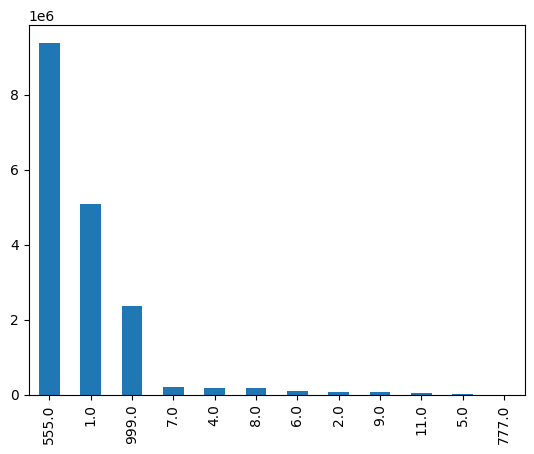

555.0    9387198
1.0      5092705
999.0    2373712
7.0       207395
4.0       164194
8.0       164111
6.0       104076
2.0        61784
9.0        61784
11.0       35993
5.0        20668
777.0        170
Name: regle, dtype: int64


In [7]:
count_regle=df.regle.value_counts()
count_regle.plot(kind="bar")
plt.show()
print(count_regle)

La règle la plus utilisée est la règle 555 de loin. Il y a ensuite la règle 1 qui est environ 2 fois plus utilisée que la règle 999. Enfin les autres règles sont nettement moins utilisées (entre 200 000 et 20 000 fois). La règle 777 n'est utilisée que 170 fois.

#### Différents protocoles présents

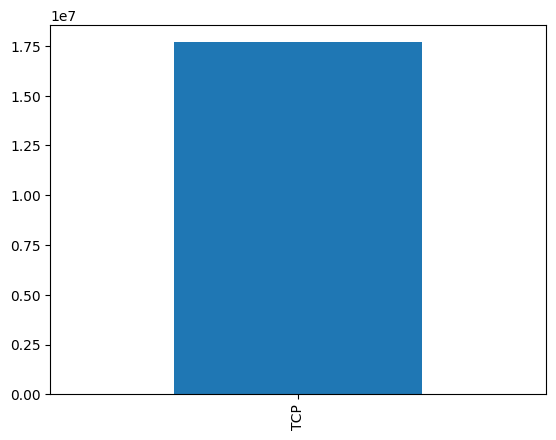

TCP    17673790
Name: protocole, dtype: int64


In [8]:
count_protocole = df["protocole"].value_counts()
count_protocole.plot(kind="bar")
plt.show()
print(count_protocole)

Seul le protocole TCP est utilisé. Celui-ci assure un service de transmission de données fiable avec une détection et une correction d'erreurs de bout en bout.

In [10]:
df_tcp = df.loc[df['protocole'] == 'TCP']
top_5_rules = df_tcp['regle'].value_counts().sort_values(ascending=False).head(5)
print(top_5_rules)

555.0    9387198
1.0      5092705
999.0    2373712
7.0       207395
4.0       164194
Name: regle, dtype: int64


Etant donné que nous avons seulement des protocoles TCP, le nombre de règles avec le protocole TCP reste le même.

#### Rapprochement des règles par rapport aux ports de destination 

In [11]:
top_10_ports = df_tcp['portdest'].value_counts().sort_values(ascending=False).head(10)
mask = df_tcp['portdest'].isin(top_10_ports.index)
df_top_10_ports = df_tcp[mask]

Il y a énormément de ports, donc nous gardons uniquement les 10 plus utilisés pour l'analyse suivante.

In [12]:
ct1 = pd.crosstab(df_top_10_ports['portdest'], df_top_10_ports['regle'])

regle       1.0    2.0     4.0    6.0     7.0     8.0    9.0     555.0  999.0
portdest                                                                     
22.0            0      0  164194      0       0  164111      0       0      0
23.0            0      0       0      0  207395       0      0       0      0
80.0       720735      0       0      0       0       0      0       0      0
443.0     4371970      0       0      0       0       0      0       0      0
445.0           0      0       0  88512       0       0      0       0      0
3306.0          0  61784       0      0       0       0  61784       0      0
51623.0         0      0       0      0       0       0      0   97128     12
58428.0         0      0       0      0       0       0      0   94475      9
62948.0         0      0       0      0       0       0      0  100468     12
64786.0         0      0       0      0       0       0      0  135459      9


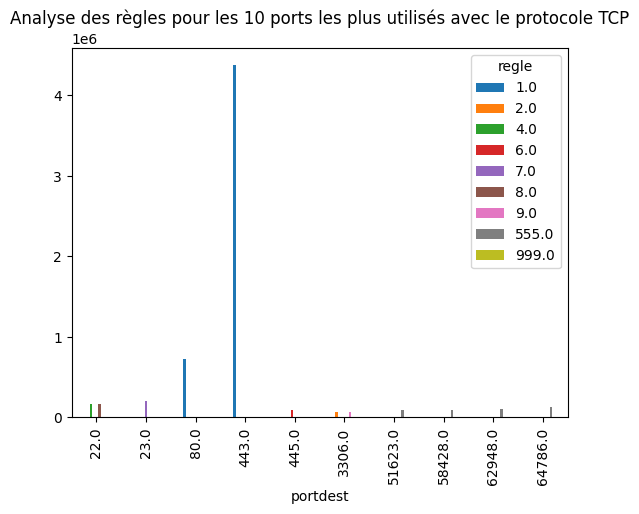

In [104]:
ct1.plot.bar()
plt.title("Analyse des règles pour les 10 ports de destination les plus utilisés avec le protocole TCP")
print(ct1)

On observe que la règle 1 est largement la plus utilisée (elle est présente sur les ports 443 et 80). Les règles 555 et 999 sont présentes sur les mêmes ports : la 555 est beaucoup utilisée, mais la 999 très peu. Les autres règles sont présentes chacunes sur différents ports.

In [106]:
#### Rapprochement des règles par rapport aux actions

In [107]:
ct2 = pd.crosstab(df_tcp['regle'], df_tcp['autorisation'])

autorisation     DENY   PERMIT
regle                         
1.0                 0  5092705
2.0                 0    61784
4.0                 0   164194
5.0             20668        0
6.0            104076        0
7.0            207395        0
8.0                 0   164111
9.0                 0    61784
11.0                0    35993
555.0               0  9387198
777.0               0      170
999.0         2373712        0


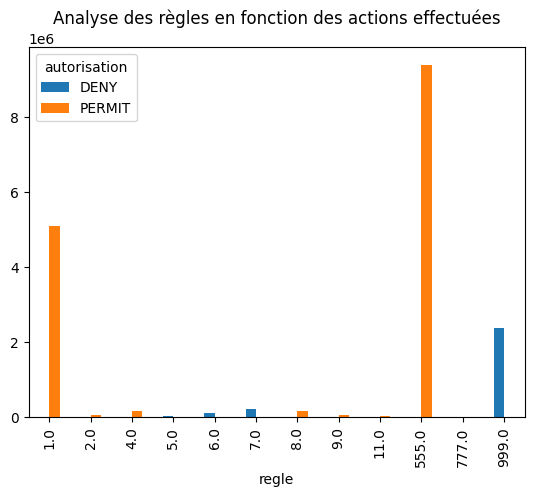

In [110]:
ct2.plot.bar()
plt.title("Analyse des règles en fonction des actions effectuées")
print(ct2)

On observe que certaines règles sont toujours permises, alors que d'autres se font toujours deny.

#### Graphiques adéquats à la sécurité des SI

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df['heure'] = df['date'].dt.hour

In [15]:
data = df.groupby('heure')['autorisation'].count().reset_index()

In [17]:
hour_counts = data.groupby("heure")["autorisation"].sum()

In [22]:
hour_counts

heure
0      284564
1     9173170
2      898296
3      318921
4      301829
5      307553
6      326629
7      310180
8      334665
9      360382
10     435812
11     421561
12     462871
13     382766
14     360017
15     338932
16     364274
17     355283
18     344214
19     341406
20     325589
21     309202
22     317660
23     298014
Name: autorisation, dtype: int64

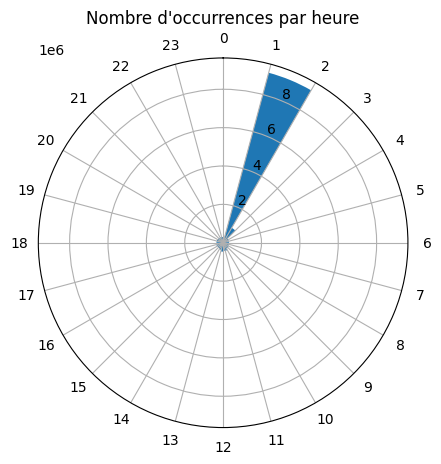

In [21]:

# Créer le graphique de type coord polar plot
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
theta = np.linspace(0, 2*np.pi, len(hour_counts)+1)[:-1]
bars = ax.bar(theta, hour_counts, width=2*np.pi/len(hour_counts), align="edge")

# Personnaliser le graphique
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(theta)
ax.set_xticklabels(hour_counts.index.astype(str))
ax.set_title("Nombre d'occurrences par heure")

# Afficher le graphique
plt.show()

In [26]:
hour_counts[1:22]

heure
1     9173170
2      898296
3      318921
4      301829
5      307553
6      326629
7      310180
8      334665
9      360382
10     435812
11     421561
12     462871
13     382766
14     360017
15     338932
16     364274
17     355283
18     344214
19     341406
20     325589
21     309202
Name: autorisation, dtype: int64

In [36]:
hc2=hour_counts.drop(1)
hc2

heure
0     284564
2     898296
3     318921
4     301829
5     307553
6     326629
7     310180
8     334665
9     360382
10    435812
11    421561
12    462871
13    382766
14    360017
15    338932
16    364274
17    355283
18    344214
19    341406
20    325589
21    309202
22    317660
23    298014
Name: autorisation, dtype: int64

ValueError: The number of FixedLocator locations (23), usually from a call to set_ticks, does not match the number of ticklabels (24).

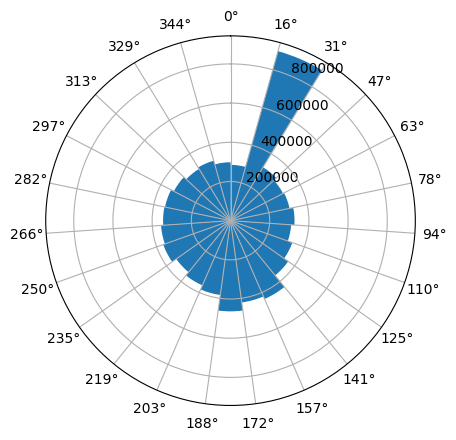

In [37]:

# Créer le graphique de type coord polar plot
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
theta = np.linspace(0, 2*np.pi, len(hc2)+1)[:-1]
bars = ax.bar(theta, hc2, width=2*np.pi/len(hc2), align="edge")

# Personnaliser le graphique
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(theta)
ax.set_xticklabels(hour_counts.index.astype(str))
ax.set_title("Nombre d'occurrences par heure")

# Afficher le graphique
plt.show()